#### Importação de libs

In [ ]:
!pip install pulp
!pip install latexify-py
import math
import latexify
import pulp
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.2 MB 2.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Exercício 1.5

# Modelagem

#### Função Objetivo

In [ ]:
@latexify.with_latex
def maxLucro(x1, x2):
  return 7*x1 + 9*x2
maxLucro 

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x7f7d309b78d0>

#### Restrições tecnicas e Restrições de negatividade

In [ ]:
@latexify.with_latex
def restricoes(x1, x2):
  if 1:
    return (-x1 + x2 <= 2)
  elif 2:
    return (x1 <= 5)  
  elif 3:
    return (x2 <= 6)      
  elif 4:
    return (3*x1 + 5*x2 >= 15)      
  elif 5:
    return (5*x1 + 4*x2 >= 20)      
  else:
    return (x2 and x1) >= 0

restricoes  

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x7f7d309ca410>

#Método gráfico
#### Achando os pontos
####### Observação inicializar 0 para as variaveis para encontrar o valor da outras


*   Inicializar 0 para as variaveis para encontrar o valor da outras variaveis
*   Equação da função objetivo encontramos o gradiente que está perpendicular a reta da solução

#### Restrição -x1 + x2 = 2

Quando x1=0 então x2=?
-(0)+x2=2
x2=2

Quando x2=0 então x1=?
-x1+(0)=2
-x1=2
x1=-2

#### Restrição x1=5

#### Restrição x2=6

#### Restrição 3x1 + 5x2 = 15

Quando x1=0 então x2=?
3(0)+5x2=15
5x2=15
x2=15/5=3

Quando x2=0 então x1=?
3x1+5(0)=15
3x1=15
x1=15/3=5

#### Restrição 5x1+4x2=20

Quando x1=0 então x2=?
5(0)+4x2=20
4x2=20
x2=20/4=5

Quando x2=0 então x1=?
5x1+4(0)=20
5x1=20
x1=20/5=4

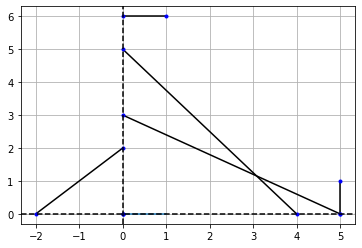

In [ ]:
# [x1, y1]
ponto_o = [0, 0] # z = 0
plt.plot(ponto_o)

# Dados retas  

list_values = []
list_values.append([[0, -2], [2, 0]])
list_values.append([[5, 5], [0, 1]])
list_values.append([[0, 1], [6, 6]])
list_values.append([[0, 5], [3, 0]])
list_values.append([[0, 4], [5, 0]])

area_de_solucao = [[0], [0]]
list_values.append(area_de_solucao)


def plot_pontos(x1, x2, color):
  plt.plot(x1, x2, color=color)

for x in list_values:
  plot_pontos(x[0], x[1], color='black')
  plt.plot(x[0], x[1], 'b.')
  
plt.fill_between(area_de_solucao[0], area_de_solucao[1])

plt.plot(ponto_o, ponto_o, 'b.')


#plt.legend(['Reta 0'], loc=9)

plt.grid(True)
plt.axvline(0, c='black', ls='--')
plt.axhline(0, c='black', ls='--')
plt.show()


# Programação

In [ ]:
# Definir o modelo
model = pulp.LpProblem('Lista 2 - Exercicio 1.4', sense=pulp.LpMaximize)

# Adicionar as variáveis
x = pulp.LpVariable.dicts(indices=[1, 2], cat=pulp.LpContinuous, lowBound=0, name='x')

# Adicionar as Restruições
model.addConstraint(-x[1] + x[2] <= 2, name='restricao_1')
model.addConstraint(x[1] <= 5, name='restricao_2')
model.addConstraint(x[2] <= 6, name='restricao_3')
model.addConstraint(3*x[1] + 5*x[2] >= 15, name='restricao_4')
model.addConstraint(5*x[1] + 4*x[2] >= 20, name='restricao_5')

# Função Objetivo
model.setObjective(7*x[1] + 9*x[2])

# Optimizar
model.solve()

# Obter e imprimir a solução
x_sol = {i: x[i].value() for i in [1, 2]}
print(f'x = {x_sol}')
z = 7*x_sol[1] + 9*x_sol[2]
print(f'z = {z}')

x = {1: 5.0, 2: 6.0}
z = 89.0


/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")
